In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy
import statistics, statsmodels

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
heart = pd.read_csv('FinalHeart.csv')

In [4]:
heart.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
heart.shape

(720, 14)

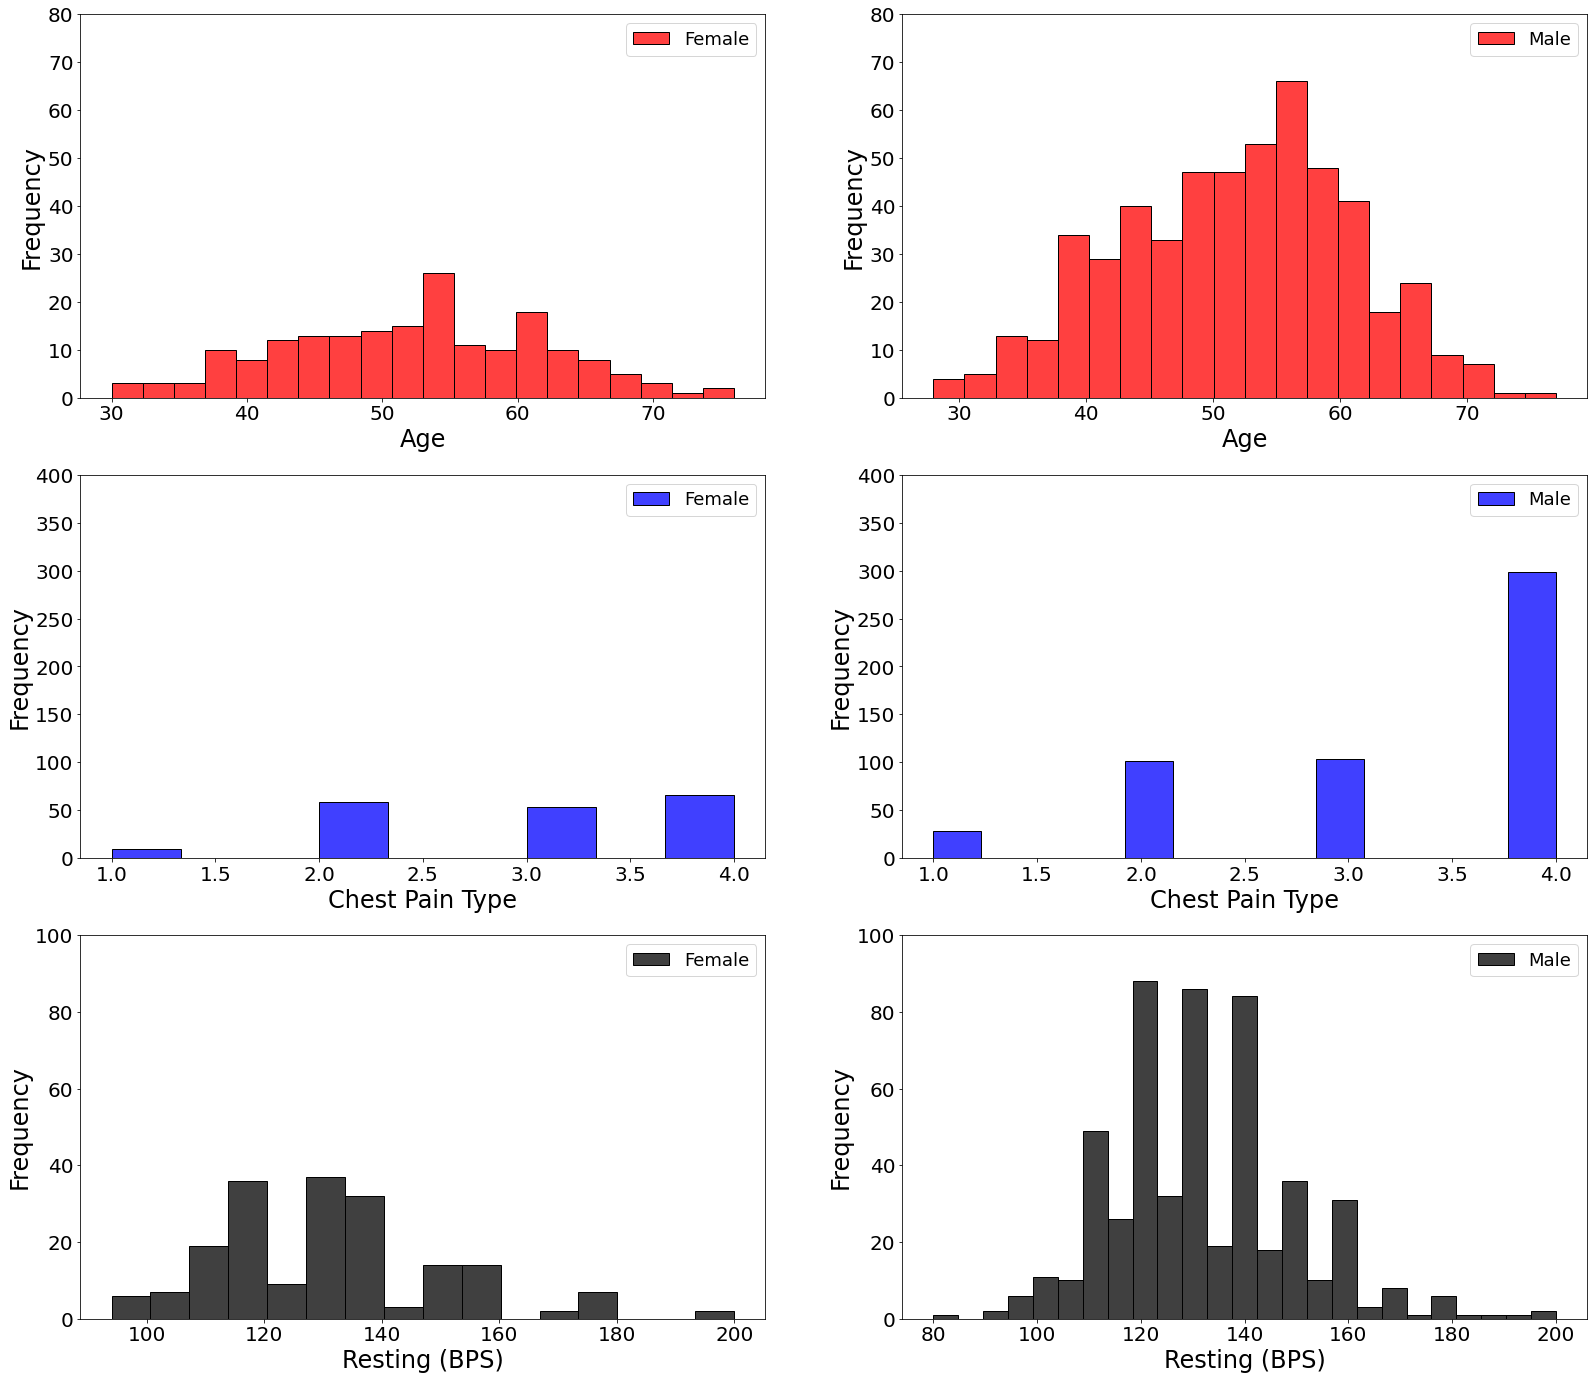

In [6]:
fig, axis = plt.subplots(3,2,figsize=(27,24))

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'age', color = 'red',ax = axis[0,0], bins = 20, label = 'Female')
axis[0,0].set_xlabel('Age',fontsize=24)
axis[0,0].set_ylabel('Frequency',fontsize=24)
axis[0,0].tick_params(axis='both',labelsize=20)
axis[0,0].set_ylim([0,80])
axis[0,0].legend(fontsize=18)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'age', color = 'red',ax = axis[0,1], bins = 20, label = 'Male')
axis[0,1].set_xlabel('Age',fontsize=24)
axis[0,1].set_ylabel('Frequency',fontsize=24)
axis[0,1].tick_params(axis='both',labelsize=20)
axis[0,1].set_ylim([0,80])
axis[0,1].legend(fontsize=18)

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'cp', color = 'blue',ax = axis[1,0], label = 'Female')
axis[1,0].set_xlabel('Chest Pain Type',fontsize=24)
axis[1,0].set_ylabel('Frequency',fontsize=24)
axis[1,0].set_ylim([0,400])
axis[1,0].tick_params(axis='both',labelsize=20)
axis[1,0].legend(fontsize=18)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'cp', color = 'blue',ax = axis[1,1], label = 'Male')
axis[1,1].set_xlabel('Chest Pain Type',fontsize=24)
axis[1,1].set_ylabel('Frequency',fontsize=24)
axis[1,1].set_ylim([0,400])
axis[1,1].tick_params(axis='both',labelsize=20)
axis[1,1].legend(fontsize=18)

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'trestbps', color = 'black',ax = axis[2,0], label = 'Female')
axis[2,0].set_xlabel('Resting (BPS)',fontsize=24)
axis[2,0].set_ylabel('Frequency',fontsize=24)
axis[2,0].set_ylim([0,100])
axis[2,0].tick_params(axis='both',labelsize=20)
axis[2,0].legend(fontsize=18)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'trestbps', color = 'black',ax = axis[2,1], label = 'Male')
axis[2,1].set_xlabel('Resting (BPS)',fontsize=24)
axis[2,1].set_ylabel('Frequency',fontsize=24)
axis[2,1].set_ylim([0,100])
axis[2,1].tick_params(axis='both',labelsize=20)
axis[2,1].legend(fontsize=18);

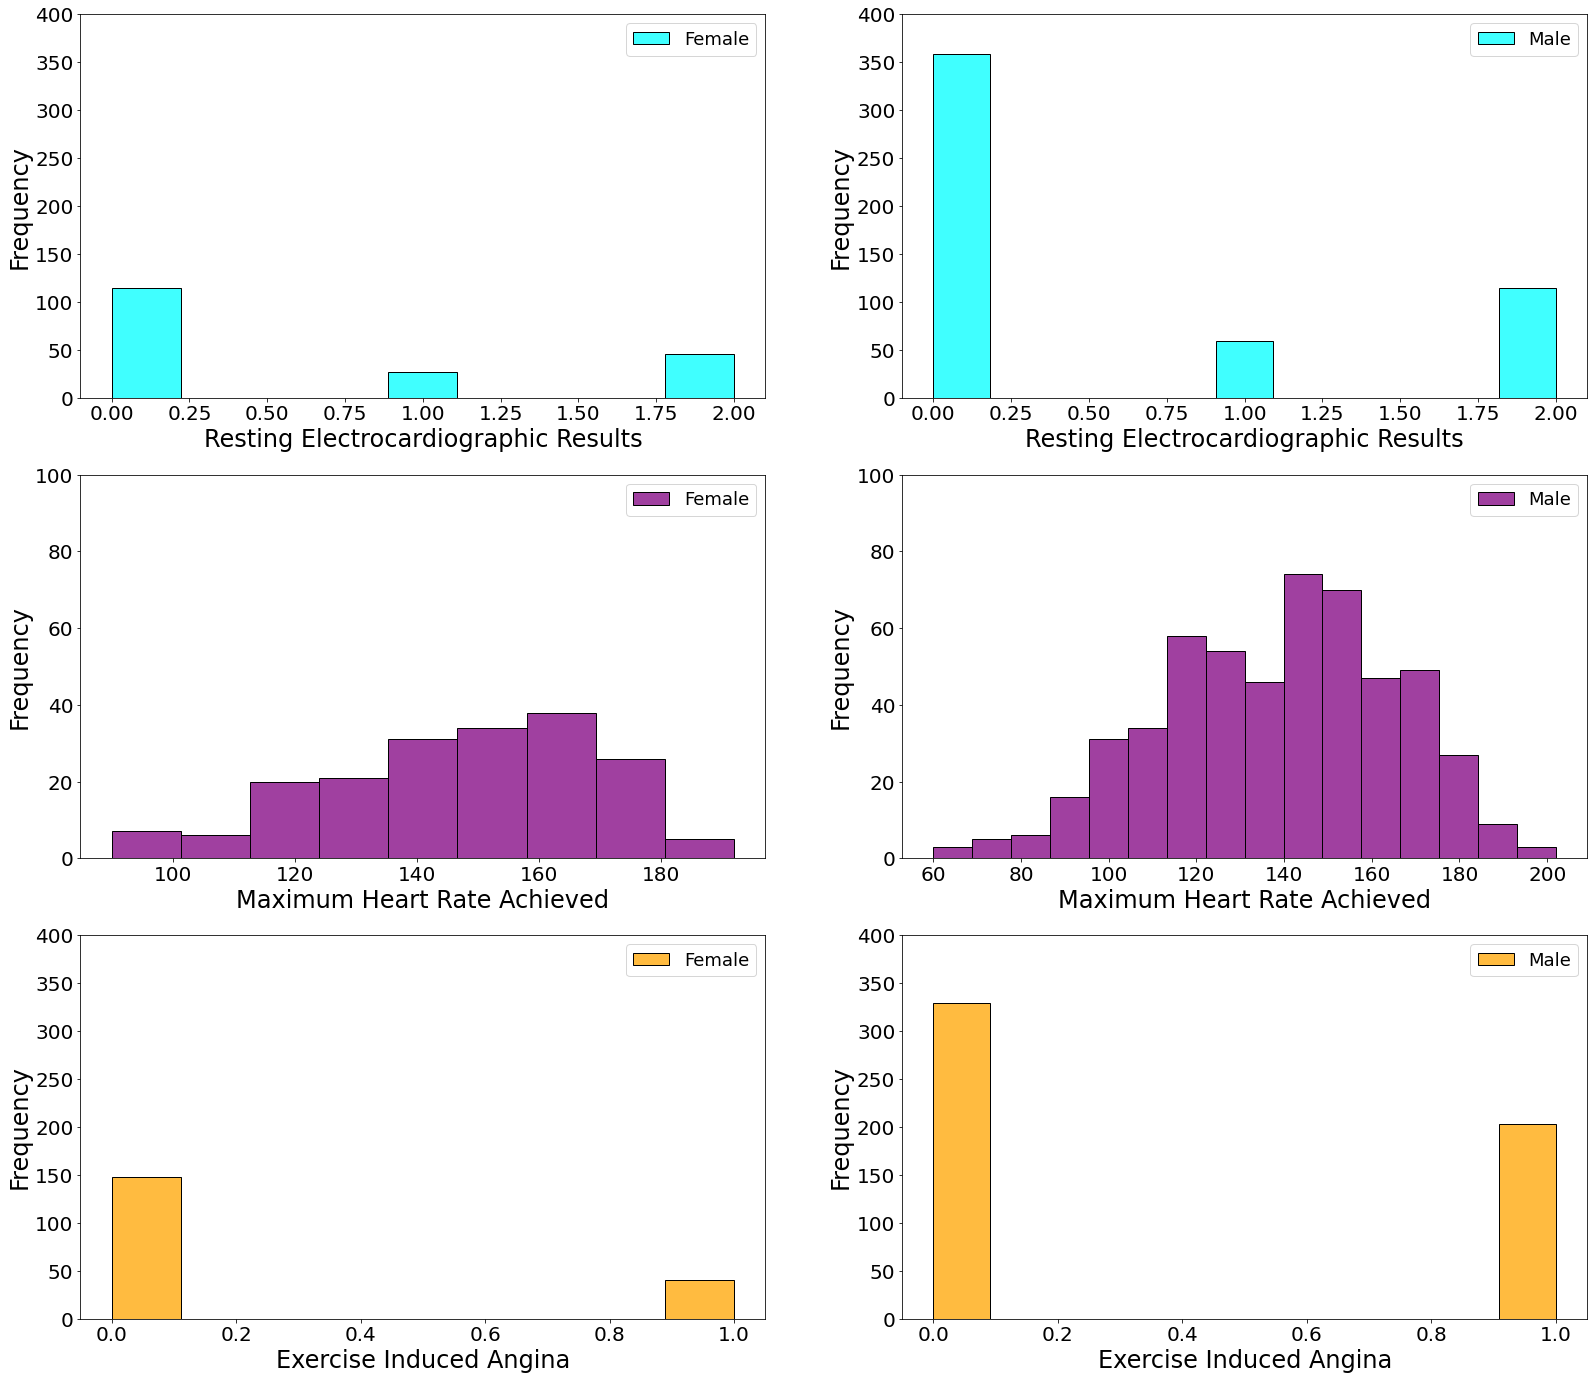

In [7]:
fig, axis = plt.subplots(3,2,figsize=(27,24))

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'restecg', color = 'cyan',ax = axis[0,0], label = 'Female')
axis[0,0].set_xlabel('Resting Electrocardiographic Results',fontsize=24)
axis[0,0].set_ylabel('Frequency',fontsize=24)
axis[0,0].set_ylim([0,400])
axis[0,0].tick_params(axis='both',labelsize=20)
axis[0,0].legend(fontsize=18)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'restecg', color = 'cyan',ax = axis[0,1], label = 'Male')
axis[0,1].set_xlabel('Resting Electrocardiographic Results',fontsize=24)
axis[0,1].set_ylabel('Frequency',fontsize=24)
axis[0,1].set_ylim([0,400])
axis[0,1].tick_params(axis='both',labelsize=20)
axis[0,1].legend(fontsize=18)

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'thalach', color = 'purple',ax = axis[1,0], label = 'Female')
axis[1,0].set_xlabel('Maximum Heart Rate Achieved',fontsize=24)
axis[1,0].set_ylabel('Frequency',fontsize=24)
axis[1,0].set_ylim([0,100])
axis[1,0].tick_params(axis='both',labelsize=20)
axis[1,0].legend(fontsize=18)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'thalach', color = 'purple',ax = axis[1,1], label = 'Male')
axis[1,1].set_xlabel('Maximum Heart Rate Achieved',fontsize=24)
axis[1,1].set_ylabel('Frequency',fontsize=24)
axis[1,1].set_ylim([0,100])
axis[1,1].tick_params(axis='both',labelsize=20)
axis[1,1].legend(fontsize=18)

sns.histplot(data = heart.loc[heart['sex']==0.0,:], x = 'exang', color = 'orange',ax = axis[2,0], label = 'Female')
axis[2,0].set_xlabel('Exercise Induced Angina',fontsize=24)
axis[2,0].set_ylabel('Frequency',fontsize=24)
axis[2,0].set_ylim([0,400])
axis[2,0].tick_params(axis='both',labelsize=20)
axis[2,0].legend(fontsize=18)

sns.histplot(data = heart.loc[heart['sex']==1.0,:], x = 'exang', color = 'orange',ax = axis[2,1], label = 'Male')
axis[2,1].set_xlabel('Exercise Induced Angina',fontsize=24)
axis[2,1].set_ylabel('Frequency',fontsize=24)
axis[2,1].set_ylim([0,400])
axis[2,1].tick_params(axis='both',labelsize=20)
axis[2,1].legend(fontsize=18);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


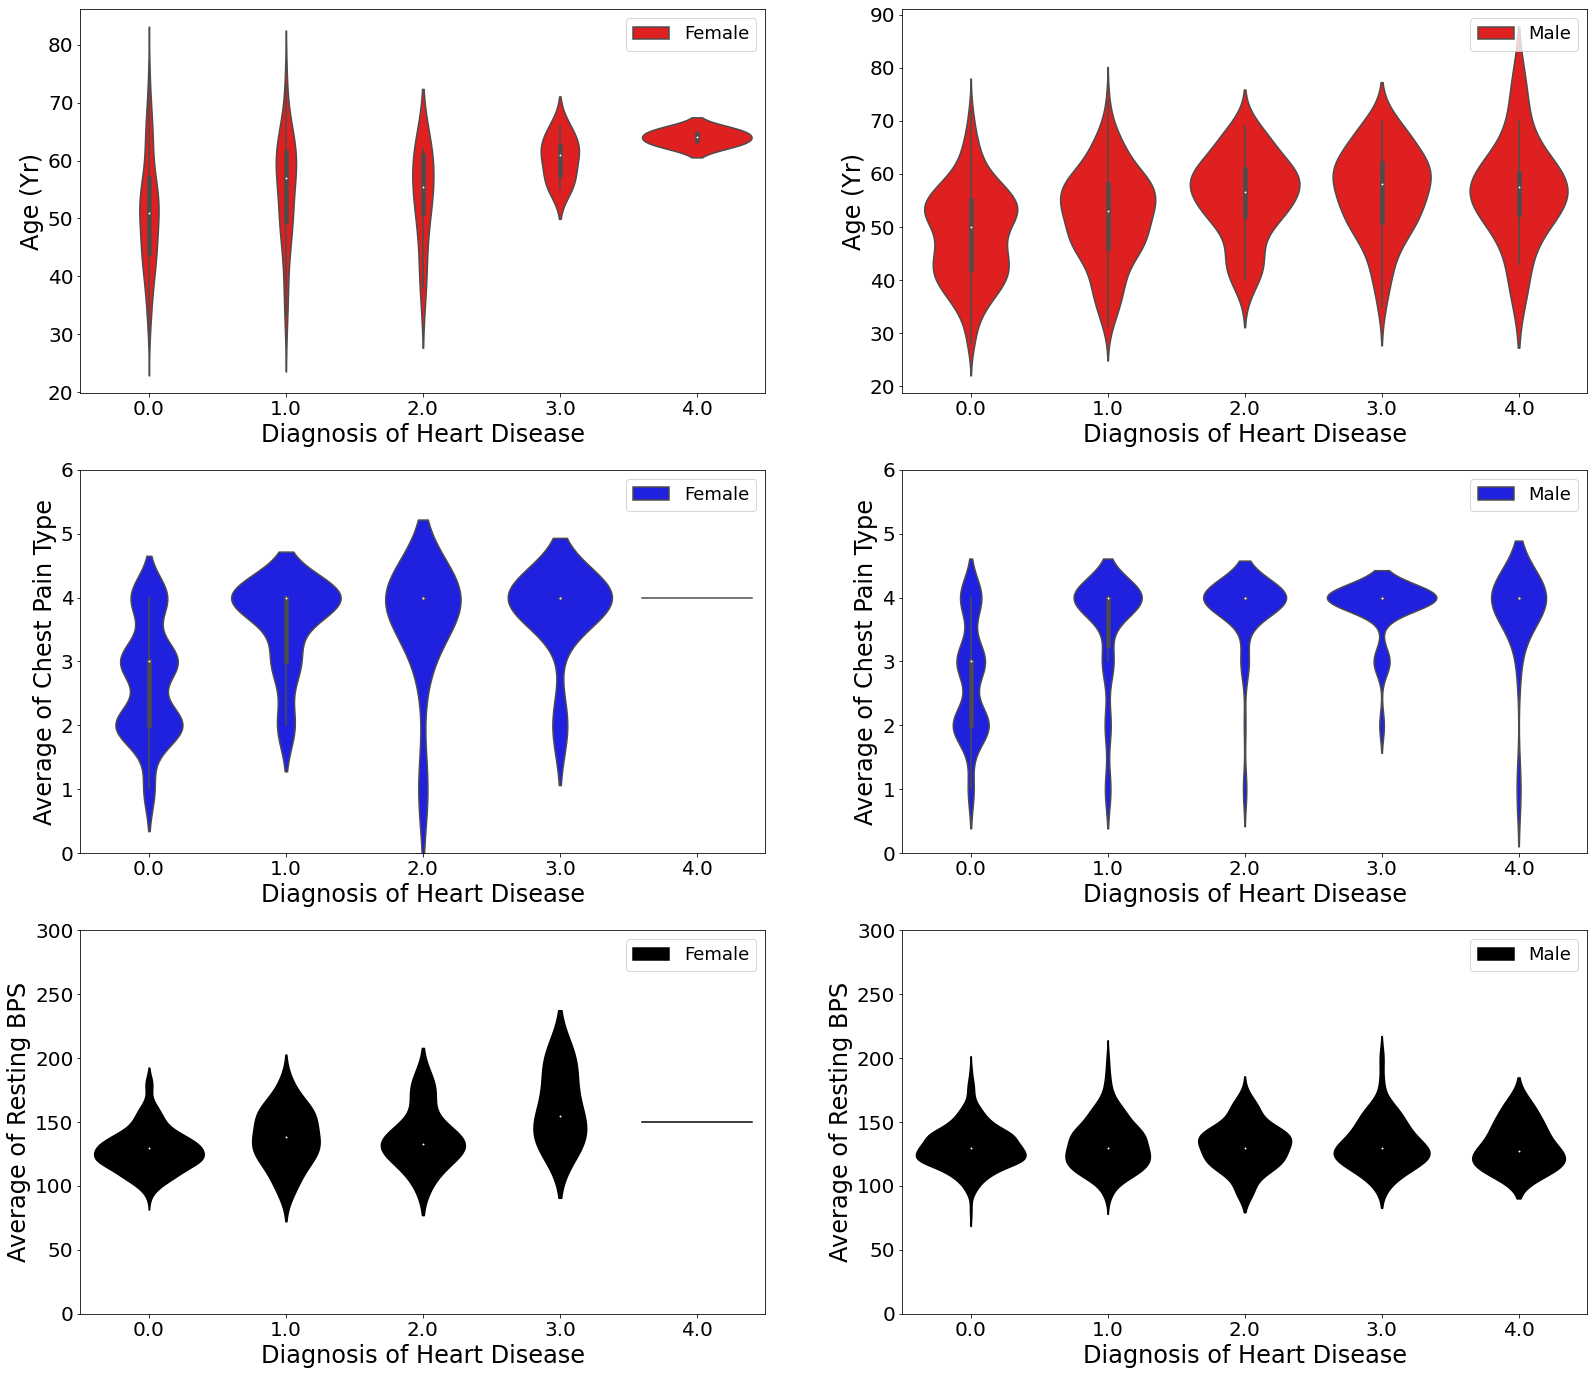

In [8]:
fig, axis = plt.subplots(3,2,figsize=(27,24))

sns.violinplot(data = heart.loc[heart['sex']==0.0,:], x = 'num', y = 'age', color = 'red',ax = axis[0,0], label = 'Female')
axis[0,0].set_xlabel('Diagnosis of Heart Disease',fontsize=24)
axis[0,0].set_ylabel('Age (Yr)',fontsize=24)
axis[0,0].tick_params(axis='both',labelsize=20)
axis[0,0].legend(fontsize=18)
axis[0,0].legend(['Female'], fontsize = 18)

sns.violinplot(data = heart.loc[heart['sex']==1.0,:], x = 'num', y = 'age', color = 'red',ax = axis[0,1], label = 'Male')
axis[0,1].set_xlabel('Diagnosis of Heart Disease',fontsize=24)
axis[0,1].set_ylabel('Age (Yr)',fontsize=24)
axis[0,1].tick_params(axis='both',labelsize=20)
axis[0,1].legend(fontsize=18)
axis[0,1].legend(['Male'], fontsize = 18)

sns.violinplot(data = heart.loc[heart['sex']==0.0,:], x = 'num', y = 'cp', color = 'blue',ax = axis[1,0], label = 'Female')
axis[1,0].set_ylabel('Average of Chest Pain Type',fontsize=24)
axis[1,0].set_xlabel('Diagnosis of Heart Disease',fontsize=24)
axis[1,0].set_ylim([0,6])
axis[1,0].tick_params(axis='both',labelsize=20)
axis[1,0].legend(['Female'],fontsize=18)

sns.violinplot(data = heart.loc[heart['sex']==1.0,:], x = 'num', y = 'cp', color = 'blue',ax = axis[1,1], label = 'Male')
axis[1,1].set_ylabel('Average of Chest Pain Type',fontsize=24)
axis[1,1].set_xlabel('Diagnosis of Heart Disease',fontsize=24)
axis[1,1].set_ylim([0,6])
axis[1,1].tick_params(axis='both',labelsize=20)
axis[1,1].legend(['Male'],fontsize=18)

sns.violinplot(data = heart.loc[heart['sex']==0.0,:], y = 'trestbps', x = 'num', color = 'black',ax = axis[2,0], label = 'Female')
axis[2,0].set_ylabel('Average of Resting BPS',fontsize=24)
axis[2,0].set_xlabel('Diagnosis of Heart Disease',fontsize=24)
axis[2,0].set_ylim([0,300])
axis[2,0].tick_params(axis='both',labelsize=20)
axis[2,0].legend(['Female'], fontsize = 18)

sns.violinplot(data = heart.loc[heart['sex']==1.0,:], y = 'trestbps', x = 'num', color = 'black',ax = axis[2,1], label = 'Male')
axis[2,1].set_ylabel('Average of Resting BPS',fontsize=24)
axis[2,1].set_xlabel('Diagnosis of Heart Disease',fontsize=24)
axis[2,1].set_ylim([0,300])
axis[2,1].tick_params(axis='both',labelsize=20)
axis[2,1].legend(['Male'], fontsize = 18);

In [9]:
cat_importance={}

In [10]:
cat = heart.num.value_counts()
cat = cat.index.values

a = heart.loc[heart['num']==cat[0],'age']
b = heart.loc[heart['num']==cat[1],'age'] 
c = heart.loc[heart['num']==cat[2],'age']
d = heart.loc[heart['num']==cat[3],'age']
e = heart.loc[heart['num']==cat[4],'age']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance['age'] = P_val

LeveneResult(statistic=1.4063068599488253, pvalue=0.23013995658257866)
1.9038108641578805e-13


In [11]:
a = heart.loc[heart['num']==cat[0],'cp']
b = heart.loc[heart['num']==cat[1],'cp'] 
c = heart.loc[heart['num']==cat[2],'cp']
d = heart.loc[heart['num']==cat[3],'cp']
e = heart.loc[heart['num']==cat[4],'cp']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance['cp'] = P_val

LeveneResult(statistic=17.466986635318904, pvalue=1.0985554364000612e-13)
3.8091808853949227e-45


In [12]:
a = heart.loc[heart['num']==cat[0],'trestbps']
b = heart.loc[heart['num']==cat[1],'trestbps'] 
c = heart.loc[heart['num']==cat[2],'trestbps']
d = heart.loc[heart['num']==cat[3],'trestbps']
e = heart.loc[heart['num']==cat[4],'trestbps']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance['trestbps'] = P_val

LeveneResult(statistic=4.040558129429204, pvalue=0.0030130438574589766)
0.1694709141483527


In [13]:
a = heart.loc[heart['num']==cat[0],'restecg']
b = heart.loc[heart['num']==cat[1],'restecg'] 
c = heart.loc[heart['num']==cat[2],'restecg']
d = heart.loc[heart['num']==cat[3],'restecg']
e = heart.loc[heart['num']==cat[4],'restecg']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance['restecg'] = P_val

LeveneResult(statistic=4.280383634466795, pvalue=0.0019825521213884655)
1.540298961958432e-05


In [14]:
a = heart.loc[heart['num']==cat[0],'thalach']
b = heart.loc[heart['num']==cat[1],'thalach'] 
c = heart.loc[heart['num']==cat[2],'thalach']
d = heart.loc[heart['num']==cat[3],'thalach']
e = heart.loc[heart['num']==cat[4],'thalach']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance['thalach'] = P_val

LeveneResult(statistic=1.3852504613995882, pvalue=0.23733573387200652)
2.4141820849192784e-25


In [15]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [16]:
a = heart.loc[heart['num']==cat[0],'chol']
b = heart.loc[heart['num']==cat[1],'chol'] 
c = heart.loc[heart['num']==cat[2],'chol']
d = heart.loc[heart['num']==cat[3],'chol']
e = heart.loc[heart['num']==cat[4],'chol']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance['chol'] = P_val

LeveneResult(statistic=61.02307684244138, pvalue=2.3069126848881066e-44)
1.555679000918642e-07


In [17]:
a = heart.loc[heart['num']==cat[0],'fbs']
b = heart.loc[heart['num']==cat[1],'fbs'] 
c = heart.loc[heart['num']==cat[2],'fbs']
d = heart.loc[heart['num']==cat[3],'fbs']
e = heart.loc[heart['num']==cat[4],'fbs']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance['fbs'] = P_val

LeveneResult(statistic=9.377149432344186, pvalue=2.1685464287641675e-07)
0.01535856497011569


In [18]:
a = heart.loc[heart['num']==cat[0],'ca']
b = heart.loc[heart['num']==cat[1],'ca'] 
c = heart.loc[heart['num']==cat[2],'ca']
d = heart.loc[heart['num']==cat[3],'ca']
e = heart.loc[heart['num']==cat[4],'ca']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance['ca'] = P_val

LeveneResult(statistic=3.4408502034824098, pvalue=0.008494068231338258)
3.0592791335630622e-33


In [19]:
a = heart.loc[heart['num']==cat[0],'slope']
b = heart.loc[heart['num']==cat[1],'slope'] 
c = heart.loc[heart['num']==cat[2],'slope']
d = heart.loc[heart['num']==cat[3],'slope']
e = heart.loc[heart['num']==cat[4],'slope']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance['slope'] = P_val

LeveneResult(statistic=2.776201255940065, pvalue=0.026175311049921206)
5.597969249144219e-16


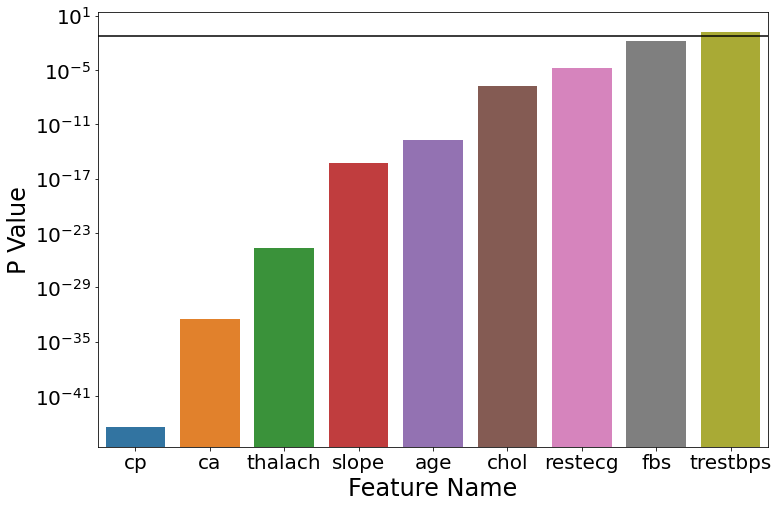

In [20]:
df = pd.DataFrame.from_dict(cat_importance,orient ='index')
df.reset_index(inplace=True)
df.columns = ['Feature','P_Value']
df.sort_values(by = 'P_Value',ascending=True, inplace=True)

fig, axis = plt.subplots(1,1,figsize=(12,8))
sns.barplot(data = df, x = 'Feature', y = 'P_Value', ax = axis)
axis.set_yscale('log')
axis.set_ylabel('P Value',fontsize=24)
axis.set_xlabel('Feature Name',fontsize=24)
axis.tick_params(axis='both',labelsize=20)

axis.axhline(0.05, color = 'black');

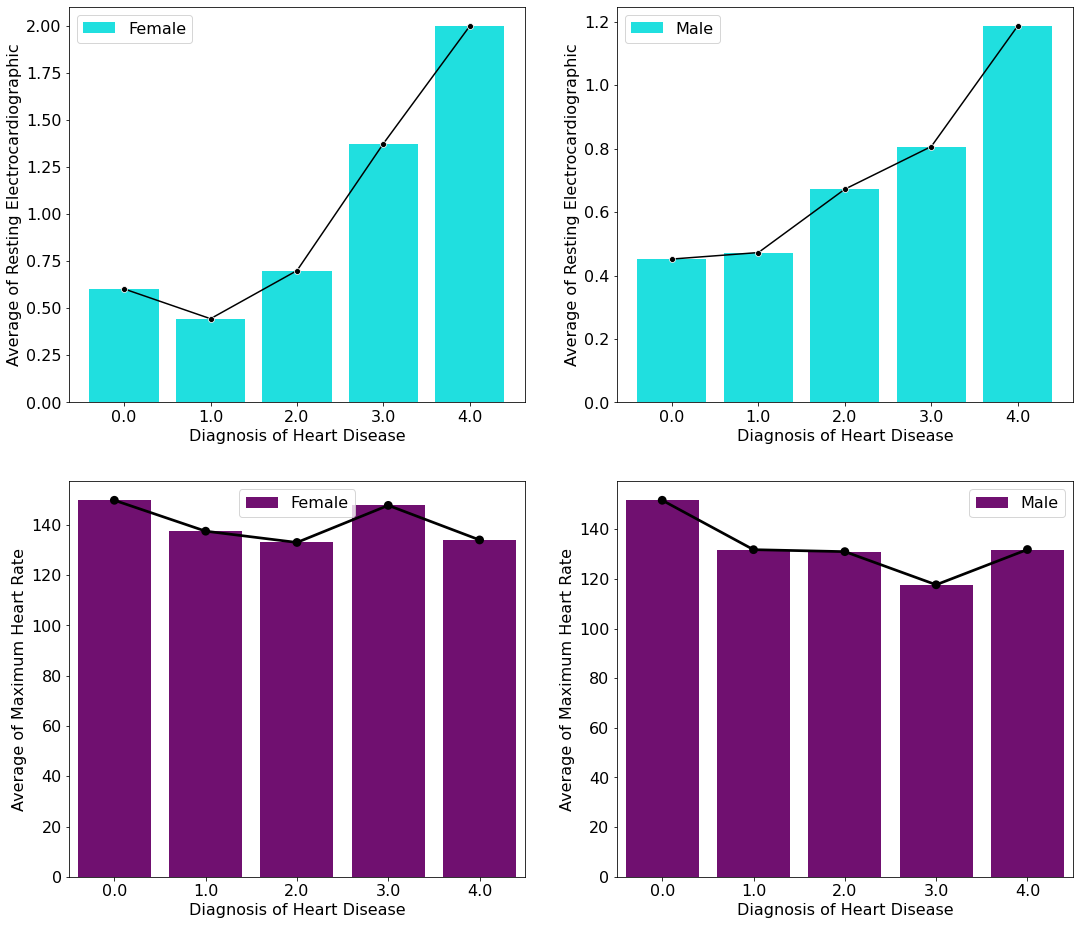

In [21]:
fig, axis = plt.subplots(2,2,figsize=(18,16))

df = heart.loc[heart['sex']==0.0,:].groupby(['num'])['restecg'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','restecg']

sns.barplot(data = df, y = 'restecg', x = 'num', color = 'cyan',ax = axis[0,0], label = 'Female')
sns.lineplot(data = df, y = 'restecg', x = 'num', color = 'black',ax = axis[0,0], marker = 'o')

axis[0,0].set_ylabel('Average of Resting Electrocardiographic',fontsize=16)
axis[0,0].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[0,0].tick_params(axis='both',labelsize=16)
axis[0,0].legend(fontsize=16)

df = heart.loc[heart['sex']==1.0,:].groupby(['num'])['restecg'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','restecg']

sns.barplot(data = df, y = 'restecg', x = 'num', color = 'cyan',ax = axis[0,1], label = 'Male')
sns.lineplot(data = df, y = 'restecg', x = 'num', color = 'black',ax = axis[0,1], marker = 'o')

axis[0,1].set_ylabel('Average of Resting Electrocardiographic',fontsize=16)
axis[0,1].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[0,1].tick_params(axis='both',labelsize=16)
axis[0,1].legend(fontsize=16)

df = heart.loc[heart['sex']==0.0,:].groupby(['num'])['thalach'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','thalach']

sns.barplot(data = df, y = 'thalach', x = 'num', color = 'purple',ax = axis[1,0], label = 'Female')
sns.pointplot(data = df, y = 'thalach', x = 'num', color = 'black',ax = axis[1,0])

axis[1,0].set_ylabel('Average of Maximum Heart Rate',fontsize=16)
axis[1,0].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[1,0].tick_params(axis='both',labelsize=16)
axis[1,0].legend(fontsize=16)

df = heart.loc[heart['sex']==1.0,:].groupby(['num'])['thalach'].aggregate(['mean'])
df.reset_index(inplace=True)
df.columns = ['num','thalach']

sns.barplot(data = df, y = 'thalach', x = 'num', color = 'purple',ax = axis[1,1], label = 'Male')
sns.pointplot(data = df, y = 'thalach', x = 'num', color = 'black',ax = axis[1,1])

axis[1,1].set_ylabel('Average of Maximum Heart Rate',fontsize=16)
axis[1,1].set_xlabel('Diagnosis of Heart Disease',fontsize=16)
axis[1,1].tick_params(axis='both',labelsize=16)
axis[1,1].legend(fontsize=16);

In [22]:
from sklearn.decomposition import PCA

In [23]:
number_comp = 13
pca = PCA(n_components = number_comp)
pca_data = pca.fit_transform(heart.drop(['num'],axis=1))
df = pd.DataFrame(data = pca_data, columns = ['feature_'+str(i) for i in range(number_comp)])
pca_df = pd.DataFrame(data = pca.components_.T, index = heart.drop(['num'],axis=1).columns,
                      columns=['feature_'+str(i) for i in range(number_comp)])
pca_df.reset_index(inplace=True)

In [24]:
df = pd.DataFrame(data = np.hstack([pca_data, heart.num.values.reshape(-1,1)]))
col_names = ['feature_'+str(i) for i in range(pca_data.shape[1])] + ['Target']
df.columns = col_names
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,Target
0,27.776665,-2.667967,15.475383,10.354439,-0.967747,0.141214,2.761400,0.867574,-0.652745,1.069422,-0.237322,-0.439024,0.699581,0.0
1,78.062935,44.935484,18.359900,7.600503,2.563258,1.382568,-0.868491,1.182824,1.474014,0.214679,-0.468159,0.130995,-0.311105,2.0
2,22.033935,12.032572,-13.301477,15.257972,-2.221975,1.423987,0.119102,0.933563,0.383461,-0.057115,-0.219180,0.230107,-0.226354,1.0
3,47.195075,-44.412606,7.073881,-8.873236,0.117435,3.214945,1.218801,-1.123513,0.135694,0.952788,-0.038261,-0.748364,-0.149922,0.0
4,0.285900,-32.316260,5.054142,-6.790970,1.349269,1.028736,1.128522,1.311090,-0.350563,-0.605840,0.556004,0.216811,-0.009440,0.0


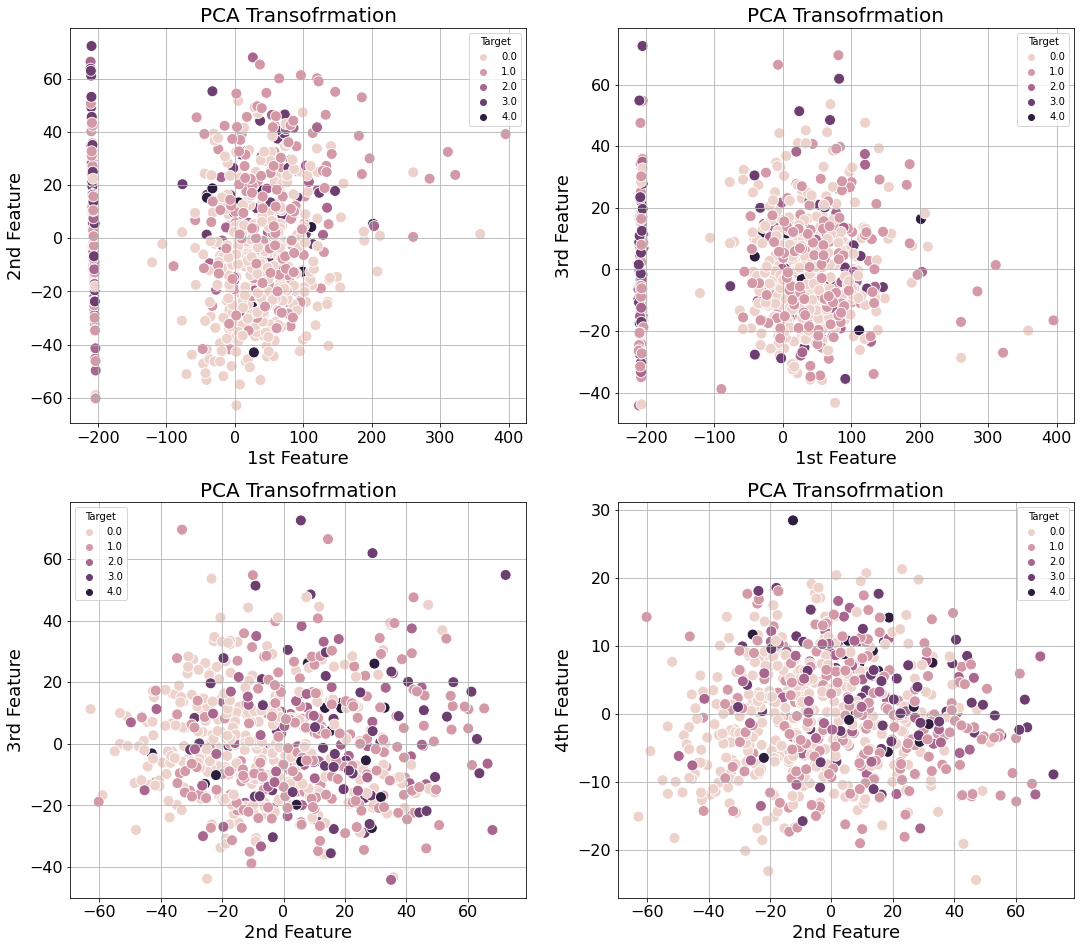

In [25]:
fig, axis = plt.subplots(2,2,figsize=(18,16))

av = sns.scatterplot(data = df, x = 'feature_0', y = 'feature_1', hue = 'Target', s = 120, ax = axis[0,0])
av.set_xlabel('1st Feature', fontsize = 18)
av.set_ylabel('2nd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('PCA Transofrmation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_0', y = 'feature_2', hue = 'Target', s = 120, ax = axis[0,1])
av.set_xlabel('1st Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('PCA Transofrmation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_1', y = 'feature_2', hue = 'Target', s = 120, ax = axis[1,0])
av.set_xlabel('2nd Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('PCA Transofrmation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_1', y = 'feature_3', hue = 'Target', s = 120, ax = axis[1,1])
av.set_xlabel('2nd Feature', fontsize = 18)
av.set_ylabel('4th Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('PCA Transofrmation', fontsize = 20)
av.grid();

In [26]:
pd.DataFrame(data = pca_data, columns = ['feature_'+str(i) for i in range(number_comp)]).to_csv('PCAData.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


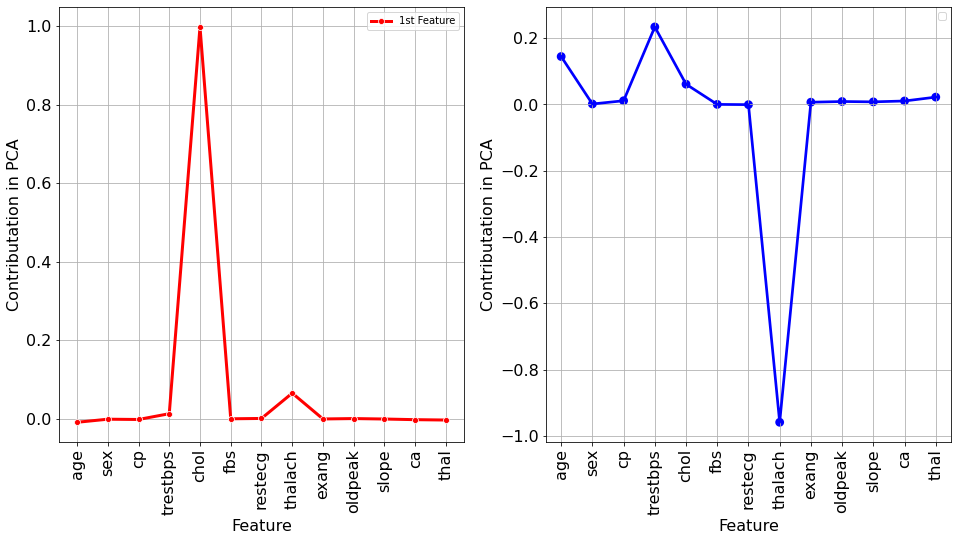

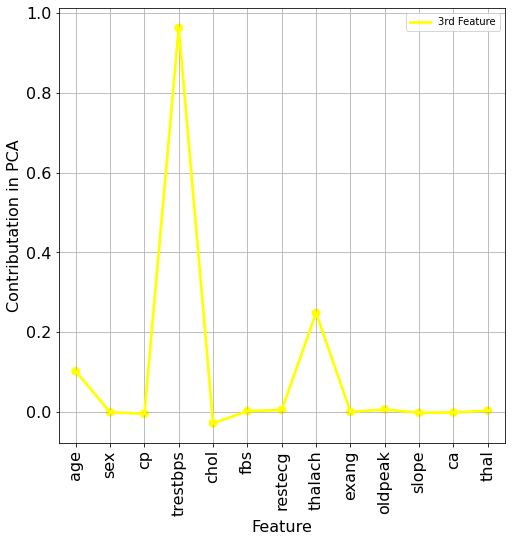

In [27]:
fig, axis = plt.subplots(1,2,figsize=(16,8))
av = sns.lineplot(data = pca_df, x = 'index', y = 'feature_0', color = 'red', ax = axis[0], linewidth = 3,
              label = '1st Feature', marker = 'o')

av.tick_params(axis='x',labelsize=12, labelrotation = 90)
av.tick_params(axis='both',labelsize=16)
av.set_xlabel('Feature', fontsize= 16)
av.set_ylabel('Contributation in PCA', fontsize= 16)
av.grid()
av.legend();

av = sns.pointplot(data = pca_df, x = 'index', y = 'feature_1', color = 'blue', ax = axis[1], linewidth = 3,
              label = '2nd Feature', marker = 's')

av.tick_params(axis='x',labelsize=12, labelrotation = 90)
av.tick_params(axis='both',labelsize=16)
av.set_xlabel('Feature', fontsize= 16)
av.set_ylabel('Contributation in PCA', fontsize= 16)
av.grid()
av.legend();

fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.pointplot(data = pca_df, x = 'index', y = 'feature_2', color = 'yellow', ax = ax, linewidth = 3,
              label = '3rd Feature', marker = '*')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in PCA', fontsize= 16)
ax.grid()
plt.legend(['3rd Feature'])

In [28]:
from sklearn.decomposition import FastICA

In [29]:
number  = 13
transformer = FastICA(n_components = number, random_state = 144, whiten='unit-variance')
ICA_data = transformer.fit_transform(heart.drop(['num'],axis=1))

In [30]:
ICA_df = pd.DataFrame(data = transformer.components_.T, index = heart.drop(['num'],axis=1).columns, 
                      columns=['feature_'+str(i) for i in range(number)])
ICA_df.reset_index(inplace=True)

In [31]:
df = pd.DataFrame(data = np.hstack([ICA_data, heart.num.values.reshape(-1,1)]))
col_names = ['feature_'+str(i) for i in range(ICA_data.shape[1])] + ['Target']
df.columns = col_names

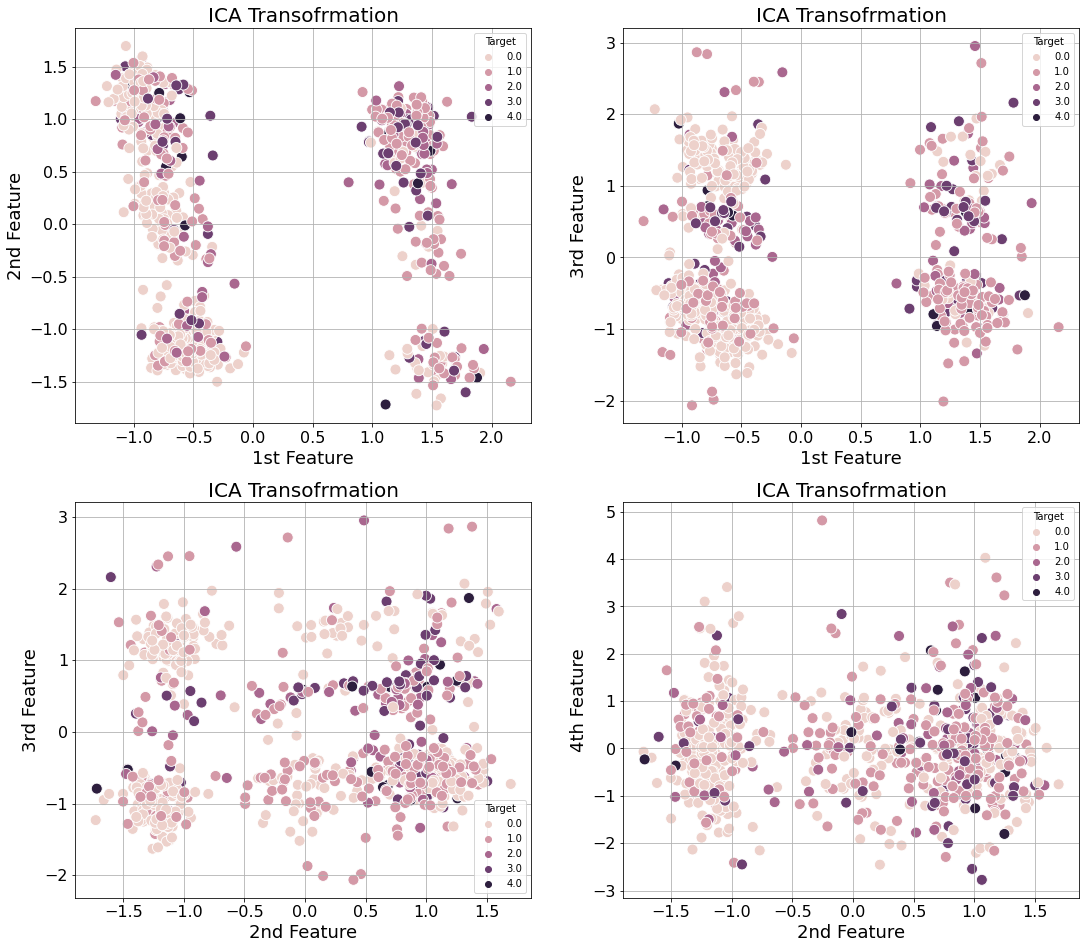

In [32]:
fig, axis = plt.subplots(2,2,figsize=(18,16))

av = sns.scatterplot(data = df, x = 'feature_0', y = 'feature_1', hue = 'Target', s = 120, ax = axis[0,0])
av.set_xlabel('1st Feature', fontsize = 18)
av.set_ylabel('2nd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transofrmation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_0', y = 'feature_2', hue = 'Target', s = 120, ax = axis[0,1])
av.set_xlabel('1st Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transofrmation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_1', y = 'feature_2', hue = 'Target', s = 120, ax = axis[1,0])
av.set_xlabel('2nd Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transofrmation', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_1', y = 'feature_3', hue = 'Target', s = 120, ax = axis[1,1])
av.set_xlabel('2nd Feature', fontsize = 18)
av.set_ylabel('4th Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('ICA Transofrmation', fontsize = 20)
av.grid();

In [33]:
pd.DataFrame(data = ICA_data, columns=['feature_'+str(i) for i in range(number)]).to_csv('ICAData.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


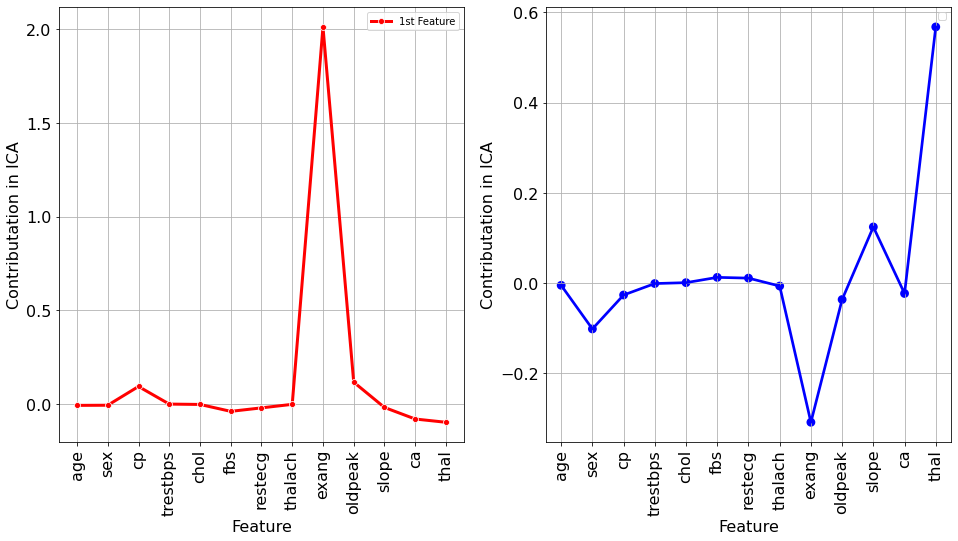

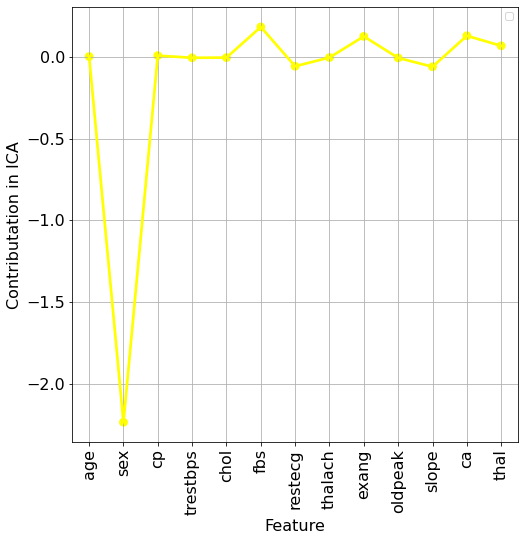

In [34]:
fig, axis = plt.subplots(1,2,figsize=(16,8))
av = sns.lineplot(data = ICA_df, x = 'index', y = 'feature_0', color = 'red', ax = axis[0], linewidth = 3,
              label = '1st Feature', marker = 'o')
av.tick_params(axis='x',labelsize=12, labelrotation = 90)
av.tick_params(axis='both',labelsize=16)
av.set_xlabel('Feature', fontsize= 16)
av.set_ylabel('Contributation in ICA', fontsize= 16)
av.grid()
av.legend()

av = sns.pointplot(data = ICA_df, x = 'index', y = 'feature_1', color = 'blue', ax = axis[1], linewidth = 3,
              label = '2nd Feature', marker = 's')
av.tick_params(axis='x',labelsize=12, labelrotation = 90)
av.tick_params(axis='both',labelsize=16)
av.set_xlabel('Feature', fontsize= 16)
av.set_ylabel('Contributation in ICA', fontsize= 16)
av.grid()
plt.legend();

fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.pointplot(data = ICA_df, x = 'index', y = 'feature_2', color = 'yellow', ax = ax, linewidth = 3,
              label = '3rd Feature', marker = '*')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in ICA', fontsize= 16)
ax.grid()
plt.legend();

In [35]:
from sklearn.decomposition import FactorAnalysis

In [36]:
transformer = FactorAnalysis(n_components=number, random_state=144)
factor_data = transformer.fit_transform(heart.drop(['num'],axis=1))
factor_df = pd.DataFrame(data = transformer.components_.T, columns = ['feature_'+str(i) for i in range(number)])

In [37]:
df = pd.DataFrame(data = np.hstack([factor_data, heart.num.values.reshape(-1,1)]))
col_names = ['feature_'+str(i) for i in range(ICA_data.shape[1])] + ['Target']
df.columns = col_names

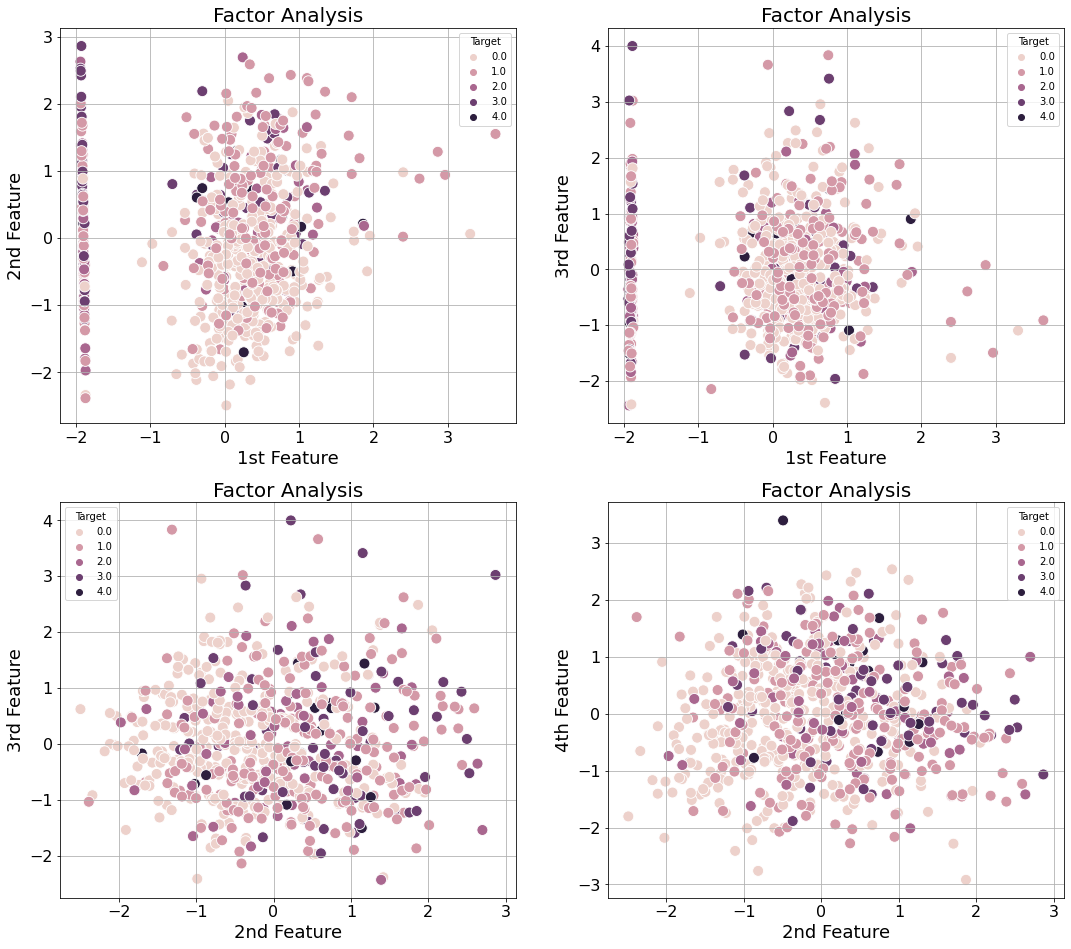

In [38]:
fig, axis = plt.subplots(2,2,figsize=(18,16))

av = sns.scatterplot(data = df, x = 'feature_0', y = 'feature_1', hue = 'Target', s = 120, ax = axis[0,0])
av.set_xlabel('1st Feature', fontsize = 18)
av.set_ylabel('2nd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('Factor Analysis', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_0', y = 'feature_2', hue = 'Target', s = 120, ax = axis[0,1])
av.set_xlabel('1st Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('Factor Analysis', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_1', y = 'feature_2', hue = 'Target', s = 120, ax = axis[1,0])
av.set_xlabel('2nd Feature', fontsize = 18)
av.set_ylabel('3rd Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('Factor Analysis', fontsize = 20)
av.grid()

av = sns.scatterplot(data = df, x = 'feature_1', y = 'feature_3', hue = 'Target', s = 120, ax = axis[1,1])
av.set_xlabel('2nd Feature', fontsize = 18)
av.set_ylabel('4th Feature', fontsize = 18)
av.tick_params(axis='both', labelsize = 16)
av.set_title('Factor Analysis', fontsize = 20)
av.grid();

In [39]:
pd.DataFrame(data = factor_data, columns=['feature_'+str(i) for i in range(number)]).to_csv('FactorData.csv')

In [40]:
factor_df['index'] = heart.drop(['num'],axis=1).columns

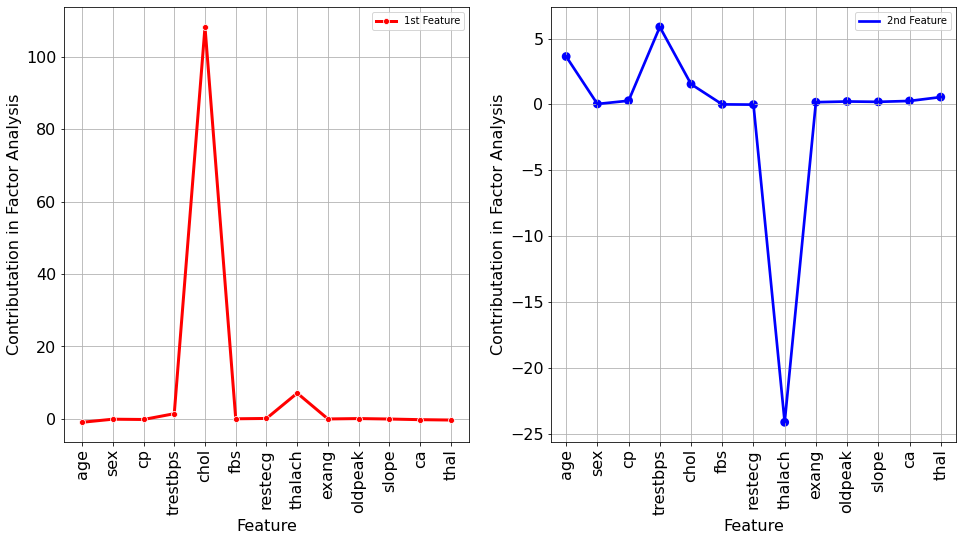

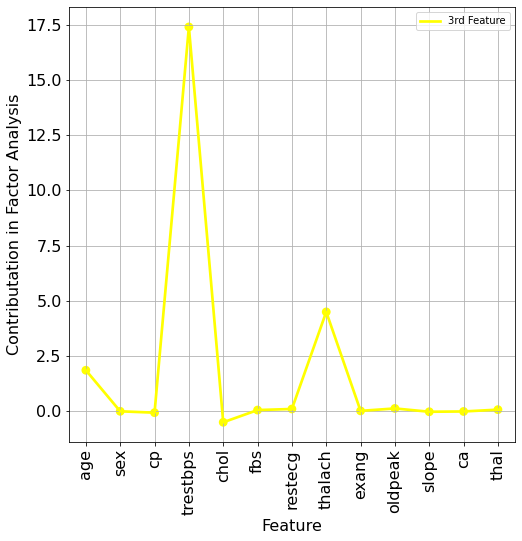

In [41]:
fig, axis = plt.subplots(1,2,figsize=(16,8))
av = sns.lineplot(data = factor_df, x = 'index', y = 'feature_0', color = 'red', ax = axis[0], linewidth = 3,
              label = '1st Feature', marker = 'o')
av.tick_params(axis='x',labelsize=12, labelrotation = 90)
av.tick_params(axis='both',labelsize=16)
av.set_xlabel('Feature', fontsize= 16)
av.set_ylabel('Contributation in Factor Analysis', fontsize= 16)
av.grid()
av.legend();

av = sns.pointplot(data = factor_df, x = 'index', y = 'feature_1', color = 'blue', ax = axis[1], linewidth = 3,
              label = '2nd Feature', marker = 's')
av.tick_params(axis='x',labelsize=12, labelrotation = 90)
av.tick_params(axis='both',labelsize=16)
av.set_xlabel('Feature', fontsize= 16)
av.set_ylabel('Contributation in Factor Analysis', fontsize= 16)
av.grid()
av.legend(['2nd Feature']);

fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.pointplot(data = factor_df, x = 'index', y = 'feature_2', color = 'yellow', ax = ax, linewidth = 3,
              label = '3rd Feature', marker = '*')
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Contributation in Factor Analysis', fontsize= 16)
ax.grid()
ax.legend(['3rd Feature']);

In [42]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest 

In [43]:
MIR = mutual_info_classif

In [44]:
X = heart.drop(['num'],axis=1)
Y = heart.loc[:,'num']

In [45]:
MIRfun = SelectKBest(score_func = MIR, k='all')

In [46]:
MIRfit = MIRfun.fit(X,Y)

In [47]:
MIR_score = MIRfit.get_support()
MIR_score

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [48]:
MIRfit.scores_

array([0.03197984, 0.02436676, 0.18283858, 0.        , 0.09634367,
       0.        , 0.02178359, 0.10219191, 0.10112995, 0.11345439,
       0.0638047 , 0.1574874 , 0.10710236])

In [49]:
data = zip(X.columns, MIRfit.scores_)
data = sorted(data, key = lambda x:x[1], reverse=True)
MIR_df = pd.DataFrame(data = data)
MIR_df.columns = ['feature','score']

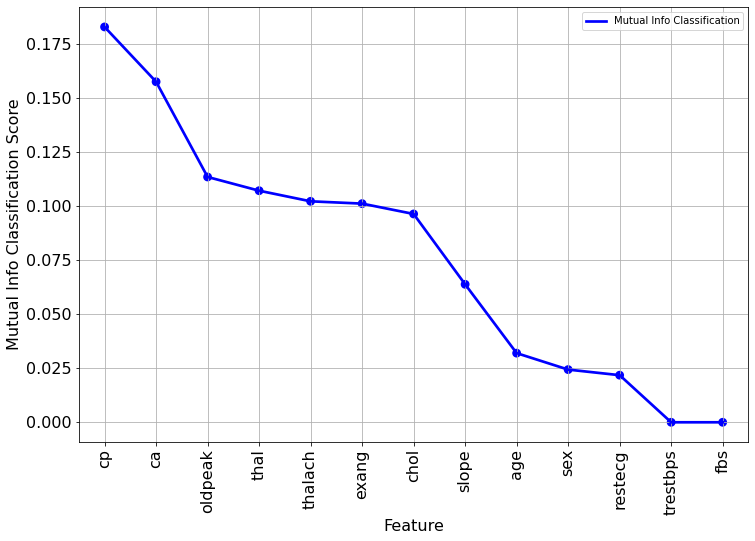

In [50]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.pointplot(data = MIR_df, x = 'feature', y = 'score', color = 'blue', ax = ax, linewidth = 3,
              label = 'Mutual Info Classification', marker = '*', s= 120)
ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Feature', fontsize= 16)
ax.set_ylabel('Mutual Info Classification Score', fontsize= 16)
ax.grid()
plt.legend(['Mutual Info Classification']);

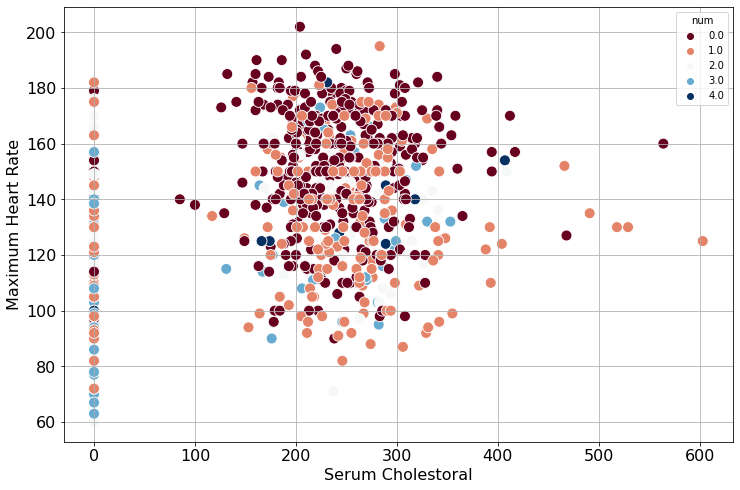

In [51]:
#important features based on PCA : chol,thalach, trestbps
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(data = heart, x = 'chol', y = 'thalach', hue = 'num', palette='RdBu', s = 120)
#ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Serum Cholestoral', fontsize= 16)
ax.set_ylabel('Maximum Heart Rate', fontsize= 16)
ax.grid()
plt.cm.ScalarMappable(cmap="RdBu");

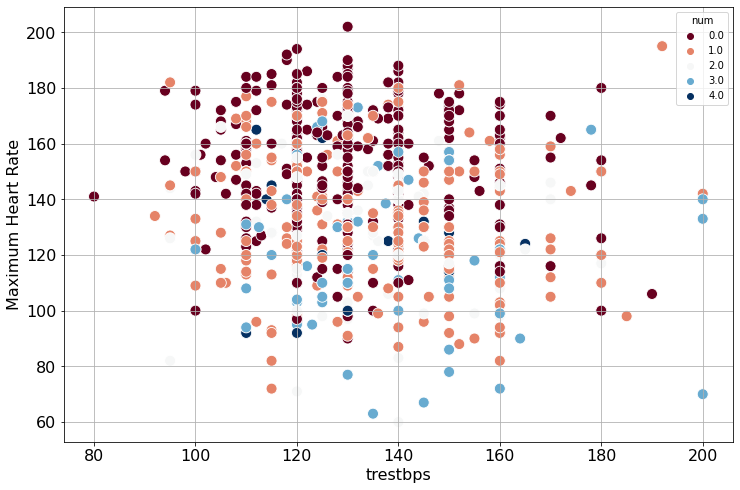

In [52]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(data = heart, x = 'trestbps', y = 'thalach', hue = 'num', palette='RdBu', s=120)
#ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('trestbps', fontsize= 16)
ax.set_ylabel('Maximum Heart Rate', fontsize= 16)
ax.grid()
plt.cm.ScalarMappable(cmap="RdBu");

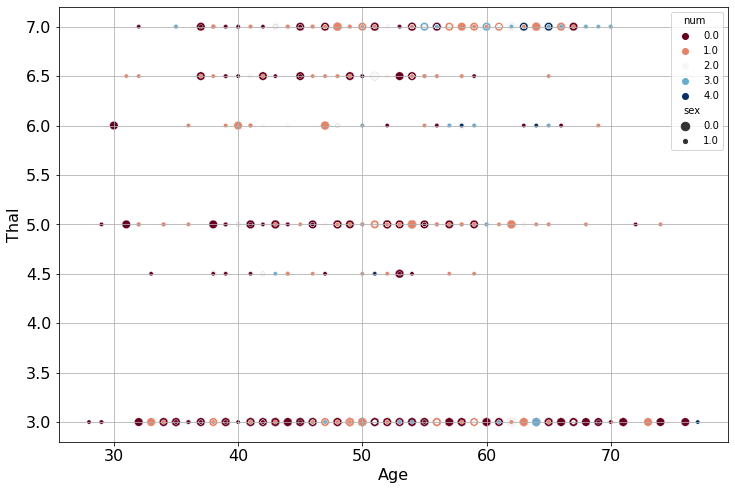

In [53]:
#important features based on ICA : age,thal
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(data = heart, x = 'age', y = 'thal', hue = 'num', size = 'sex', palette='RdBu')
#ax.tick_params(axis='x',labelsize=12, labelrotation = 90)
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel('Age', fontsize= 16)
ax.set_ylabel('Thal', fontsize= 16)
ax.grid()
plt.cm.ScalarMappable(cmap="RdBu");

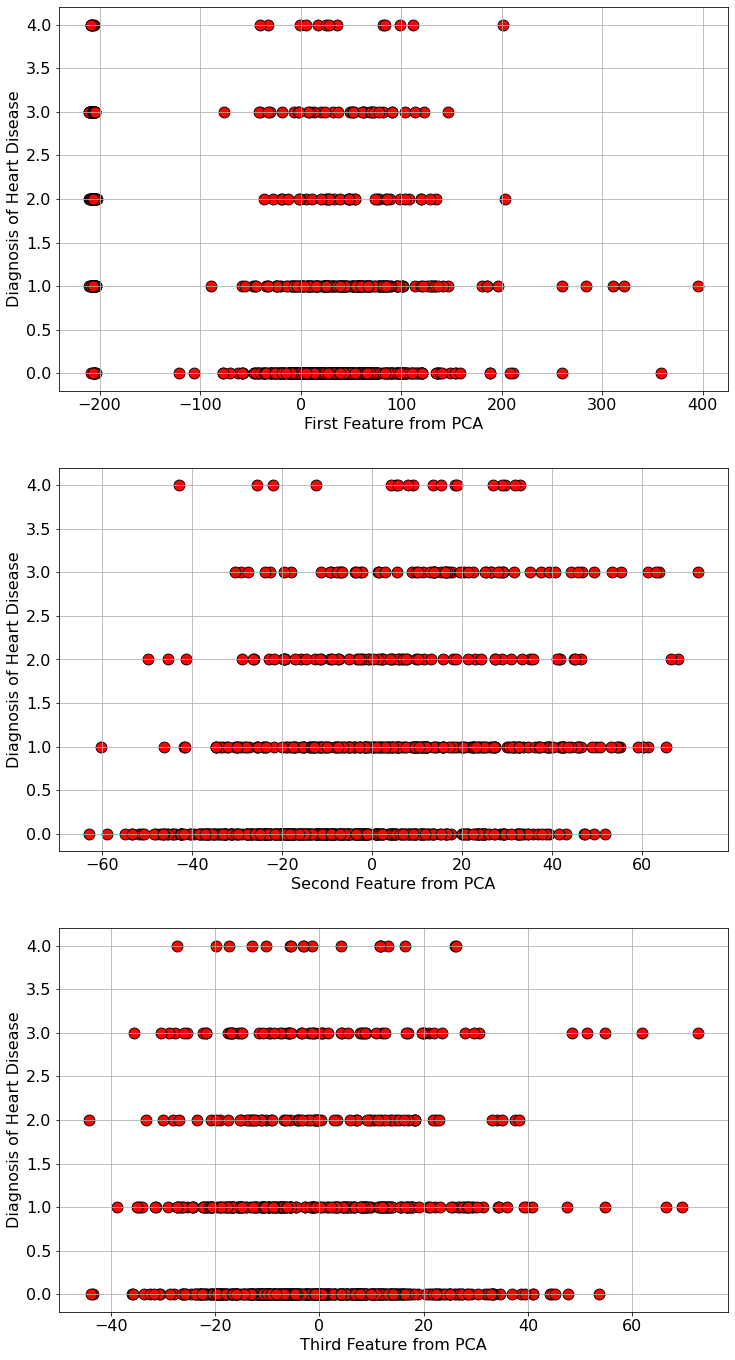

In [54]:
fig, ax = plt.subplots(3,1,figsize=(12,24))
sns.scatterplot(x = pca_data[:,0], y = heart.num.values, ax = ax[0], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('First Feature from PCA', fontsize= 16)
ax[0].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[0].grid()

sns.scatterplot(x = pca_data[:,1], y = heart.num.values, ax = ax[1], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Second Feature from PCA', fontsize= 16)
ax[1].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[1].grid()

sns.scatterplot(x = pca_data[:,2], y = heart.num.values, ax = ax[2], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[2].tick_params(axis='both',labelsize=16)
ax[2].set_xlabel('Third Feature from PCA', fontsize= 16)
ax[2].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[2].grid();

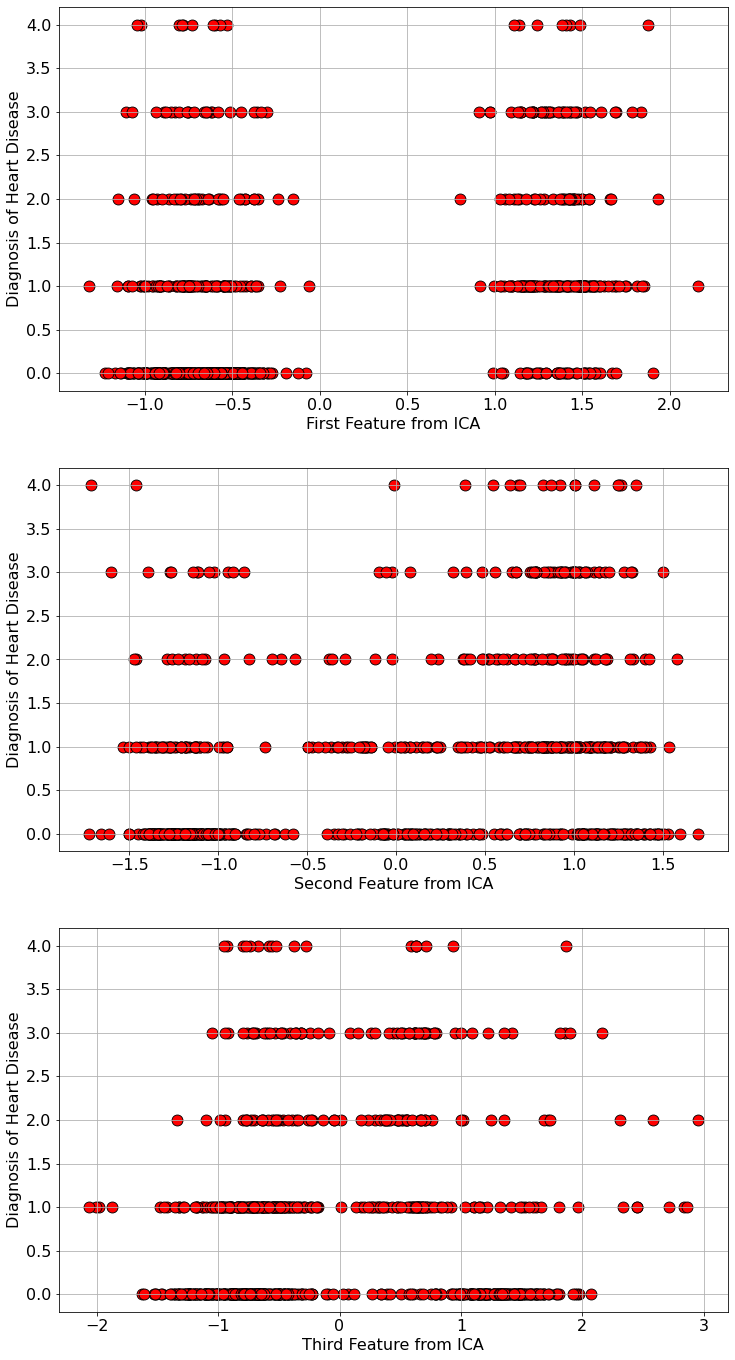

In [55]:
fig, ax = plt.subplots(3,1,figsize=(12,24))
sns.scatterplot(x = ICA_data[:,0], y = heart.num.values, ax = ax[0], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('First Feature from ICA', fontsize= 16)
ax[0].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[0].grid()

sns.scatterplot(x = ICA_data[:,1], y = heart.num.values, ax = ax[1], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Second Feature from ICA', fontsize= 16)
ax[1].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[1].grid()

sns.scatterplot(x = ICA_data[:,2], y = heart.num.values, ax = ax[2], s = 120, color = 'red', marker = 'o', 
                edgecolor = 'black')
ax[2].tick_params(axis='both',labelsize=16)
ax[2].set_xlabel('Third Feature from ICA', fontsize= 16)
ax[2].set_ylabel('Diagnosis of Heart Disease', fontsize= 16)
ax[2].grid();